# Logistic Regression

- A solution to help us predict a label.
- Keep in mind that continuous target values can be converted into categories through "discretization" (turning into buckets) (50k-100k, 100k-150k)
- Classification algorithms also often produce a probability prediction (class 0 = 10% probable, class 1 = 50% probable)
- We need a new set of error metrics for classification, MAE and MSE will not make sense here.
- Logistic regression uses a different line to predict values (it is not linear)

# The Math

- The logistic function converts any input value to a value between 0 and 1
- odds: some number n to 1.
- in maths odds = chance of event happening divided by chance of the event NOT happening.
- a coefficient = by how many times does 1 value increase if you increase another value (e.g. a and b coef = 0.1) a = 1 b = 1.1

# Maximum Likelyhood

What logistic regression uses to find the best fitting model (equivalent of RSS residual sum of squares)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
len(df)

5000

In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

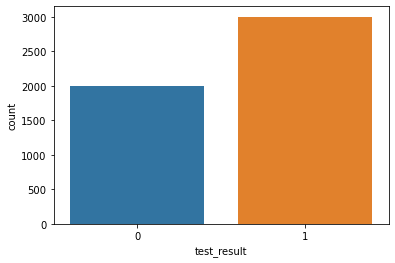

In [10]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

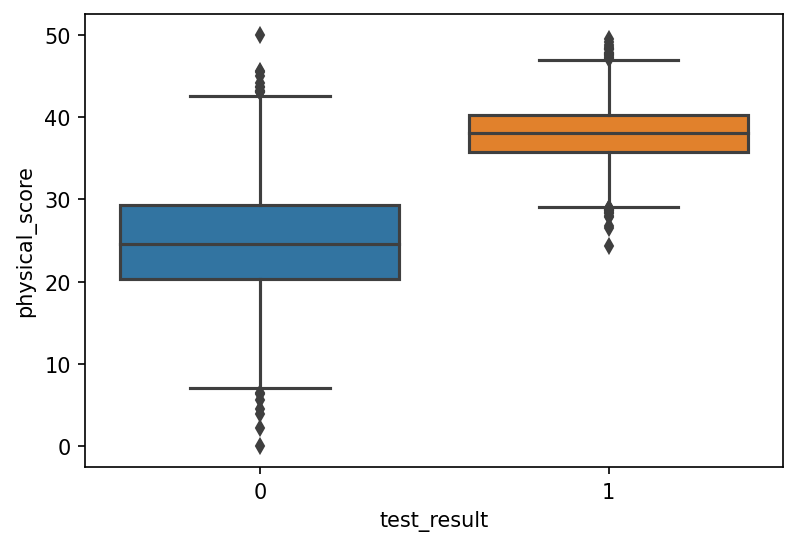

In [13]:
plt.figure(dpi=150)
sns.boxplot(x='test_result', data=df, y='physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

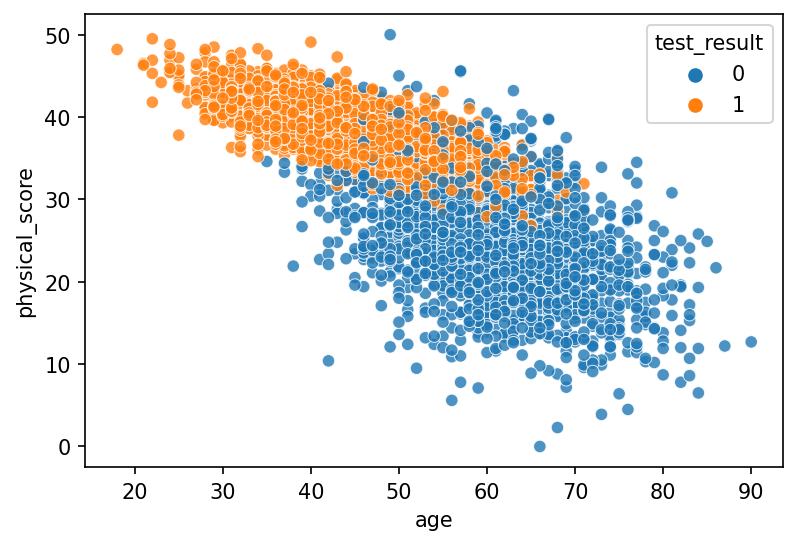

In [18]:
plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.8)

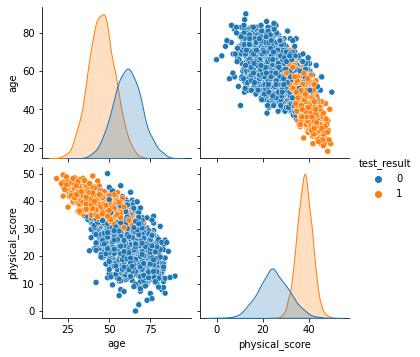

In [20]:
# Very important plot for classification.
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

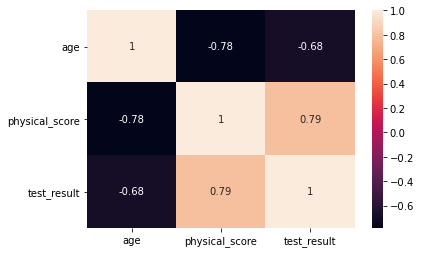

In [21]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

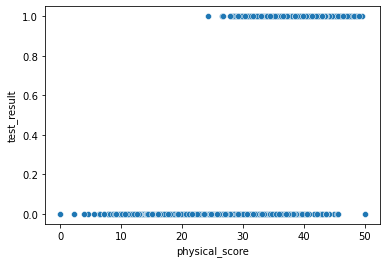

In [22]:
# Not too informative.
sns.scatterplot(x='physical_score', y='test_result', data=df)

In [23]:
from mpl_toolkits.mplot3d import Axes3D

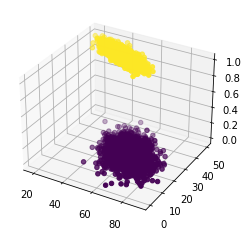

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Give x then y then z
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

# Creating and training a model

In [30]:
X = df.drop('test_result', axis=1)

In [31]:
y = df['test_result']

In [32]:
# Scale the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)

In [34]:
scaler = StandardScaler()

In [35]:
scaled_X_train = scaler.fit_transform(X_train)

In [36]:
scaled_X_test = scaler.transform(X_test)

In [37]:
# Create the actual model.
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression()

In [39]:
# Fit the data
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [40]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [43]:
ypreds = log_model.predict_proba(scaled_X_test)

In [44]:
ypreds

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [45]:
# Confusion matrix plots accuracy of categorical predicitons
# accuracy = how often is the model correct? true positives + true negatives / total
# - imbalanced classes will always result in a distorted accuracy reflecting better performance that what is truely warranted.

# Precision and Recall

- recall: how often is the model correct (true positives / total actual positives (how many relevant cases are found)
    recall of 0 = not catching any cases!
- precision: when preciciton is postive how often is it correct true positives / total predicted positives
- f1 score: harmonic mean of the precision and recall (how well you are doing in both)
- ROC (Receiver Operator Characteristic Curve) curve of true positive vs false positive
- We often gladly accept more false positives to reduce false negatives
- More area under the curve the better.

In [46]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [47]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [55]:
log_model.predict([[70, 10]])[0]

0

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [58]:
ypreds = log_model.predict(scaled_X_test)

In [59]:
ypreds

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [61]:
accuracy_score(y_test, ypreds)

0.93

In [62]:
confusion_matrix(y_test, ypreds)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [63]:
from sklearn.metrics import plot_confusion_matrix

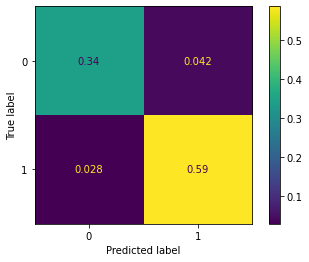

In [65]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize='all')

In [66]:
print(classification_report(y_test, ypreds))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [67]:
from sklearn.metrics import precision_score, recall_score

In [68]:
precision_score(y_test, ypreds)

0.9331210191082803

In [69]:
recall_score(y_test, ypreds)

0.9543973941368078

In [70]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

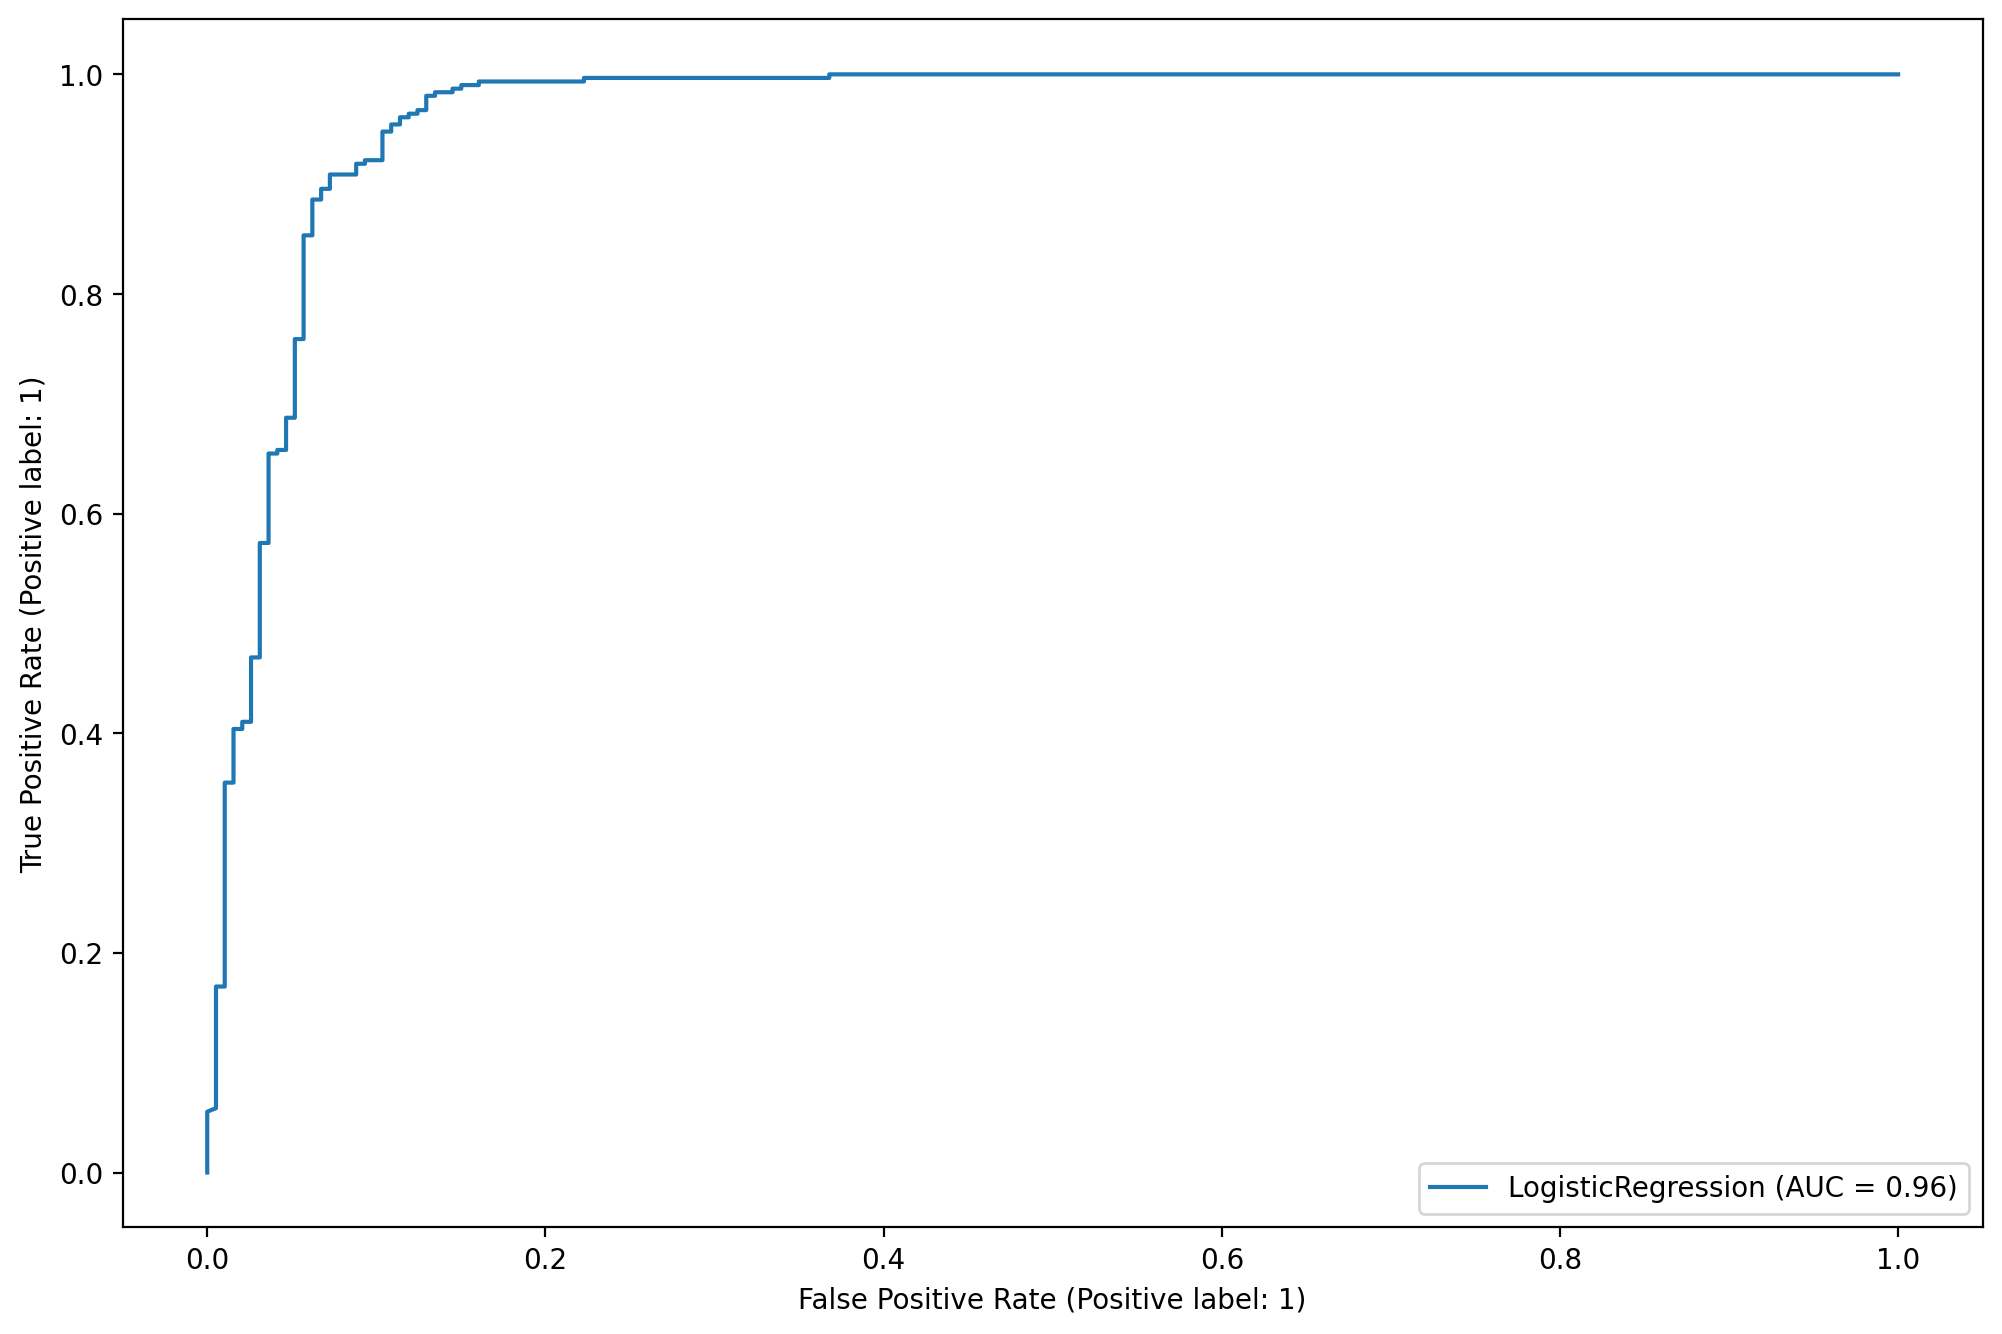

In [73]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
plot_roc_curve(log_model, scaled_X_test, y_test, ax=ax)

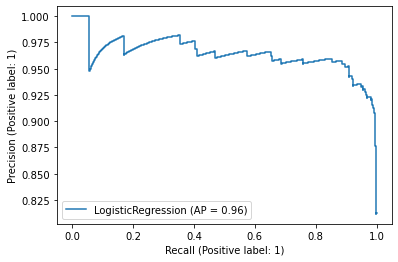

In [75]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [76]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [77]:
y_test[0]

1